# The Best Linear Unbiased Estimate (BLUE)

* Emmanuel Cosme, 2017

This notebook simply illustrates the BLUE algorithm in 1, then 2 dimensions. The BLUE algorithm corresponds to the Kalman filter analysis.
We first define the BLUE function:

In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline

def blue(xf,Pf,yobs,Robs,Hobs):
    """compute the BLUE solution."""
    HPf=np.dot(Hobs,Pf)
    InnovM=np.dot(Hobs,np.transpose(HPf))+Robs
    Innovation=yobs-np.dot(Hobs,xf)
    if np.shape(InnovM)[0]==1:
        Kgain=np.transpose(HPf)/InnovM
        xa=xf+np.dot(Innovation,Kgain)
        Pa=Pf-np.outer(Kgain,HPf)
    else:  
        Kgain=np.dot(np.transpose(HPf),np.linalg.inv(InnovM))
        xa=xf+np.dot(Kgain,Innovation)
        Pa=Pf-np.dot(Kgain,HPf)
    return xa,Pa

## 1D example

In [2]:
## Example
## 1 scalar observed - BLUE
yobs=np.array([19.])
xf=np.array([22.])
stdf=np.array([1.])
stdo=np.array([0.5])

Hobs=np.array([1.])
Pf=stdf*stdf
Robs=stdo*stdo

xa,Pa=blue(xf,Pf,yobs,Robs,Hobs)
print(xa,np.sqrt(Pa))

[19.6] [[0.4472136]]


## Graphical illustration
The BLUE equations solve Bayes problem when both the prior and the likelihood are Gaussian distributions. The solution can therefore be plotted this way. This requires the definition of the gauss1D function below. The posterior distribution is thinner than the first two, meaning a smaller variance and a more accurate estimate.

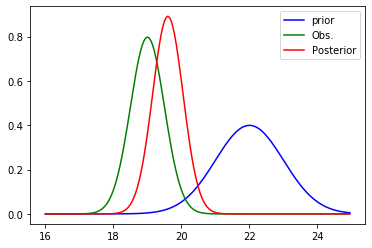

In [3]:
def gauss1D(x_in, mu, std):
    """Compute Gaussian function"""
    xtmp = (x_in - mu)/std
    xtmp = -0.5 * xtmp * xtmp
    xtmp = np.exp(xtmp)
    intx = integrate.simps(xtmp,x_in)
    xtmp /= intx
    return xtmp

xxx = np.arange(16., 25., 0.05)
xxf = gauss1D(xxx, xf[0], np.sqrt(Pf)[0])
yyy = gauss1D(xxx,yobs[0],np.sqrt(Robs)[0])
xxa = gauss1D(xxx, xa[0], np.sqrt(Pa)[0])
plt.plot(xxx,xxf,'blue', label='prior')
plt.plot(xxx,yyy,'green', label='Obs.')
plt.plot(xxx,xxa,'red', label='Posterior')
plt.legend()
#print np.shape(xxx), np.shape(yyy), np.shape(xa)

## 2D example
The system to estimate is composed of two variables, but only one of those is observed.

In [5]:
## BLUE avec 2 variables
yobs=np.array([4.])
stdo=np.array([0.5])
Hobs=np.array([0.,1.])
xf=np.array([10., 5.])
stdf=np.array([1.])
correl=0.25

Pf=stdf*stdf*np.identity(2)
Pf[0,1]=stdf*stdf*correl
Pf[1,0]=stdf*stdf*correl
Robs=stdo*stdo*np.identity(1)

xa,Pa=blue(xf,Pf,yobs,Robs,Hobs)
print(xa)
print(np.shape(np.dot(Hobs,Pf)))

[9.8 4.2]
(2,)


## Plots
We plot the prior and the posterior distributions is the phase space. 

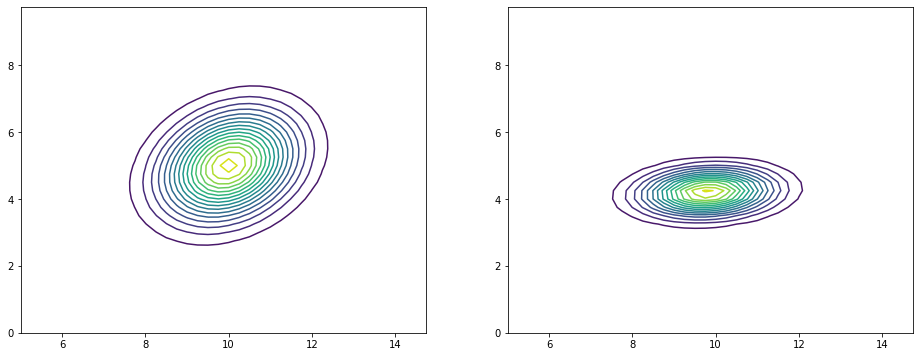

In [6]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

# imports specific to the plots in this example
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

def gauss2D(x_in, y_in, mu, mat, dx):
    """Compute 2D Gaussian function.
    x and y are meshgrid arrays."""
    gout = np.zeros_like(x_in)
    gs = np.shape(gout)
    invmat = np.linalg.inv(mat)
    for j in range(gs[1]):
        for i in range(gs[0]):
            xtmp = np.array([ x_in[i,j], y_in[i,j] ])
            xtmp = xtmp - mu
            xtmp2 = np.dot(invmat, xtmp)
            xtmp = np.dot(xtmp,xtmp2)
            xtmp = -0.5 * xtmp
            xtmp = np.exp(xtmp)
            gout[i,j] = xtmp
    intgs = np.sum(gout)*dx
    gout /= intgs
    return gout

fig = plt.figure(figsize=(16,6))

#---- First subplot
X = np.arange(5., 15., 0.25)
Y = np.arange(0., 10., 0.25)
X, Y = np.meshgrid(X, Y)
plt.subplot(1,2,1)
Z = gauss2D(X, Y, xf, Pf, 0.25)
plt.contour(X, Y, Z, 16)

#---- Second subplot
plt.subplot(1, 2, 2)
Za = gauss2D(X, Y, xa, Pa, 0.25)
plt.contour(X, Y, Za, 16)
plt.show()